In [82]:
import matplotlib.pyplot as plt

import numpy as np

from math import factorial

In [83]:
def f(x):
    return np.sin(x)

In [84]:
def derivative_of_sin(n, a):
    # Calculate the nth derivative of sin at point a
    if n % 4 == 0:
        return np.sin(a)
    elif n % 4 == 1:
        return np.cos(a)
    elif n % 4 == 2:
        return -np.sin(a)
    else: # n % 4 == 3
        return -np.cos(a)

In [85]:
def f_approx(x, order=1, center=0):
    sin_approx = 0
    for n in range(order):
        # Using the nth derivative of sin at center to calculate the coefficient
        coeff = derivative_of_sin(n, center) / factorial(n)
        sin_approx += coeff * ((x - center) ** n)
    return sin_approx

In [86]:
def f_approx1(x, order = 1, center = 0):
    sin_approx = 0
    for i in range(order):
        power = 2 * i + 1
        sin_approx += ((-1 ** i) * x ** power) / factorial(power)
    return sin_approx

0.02 0.28


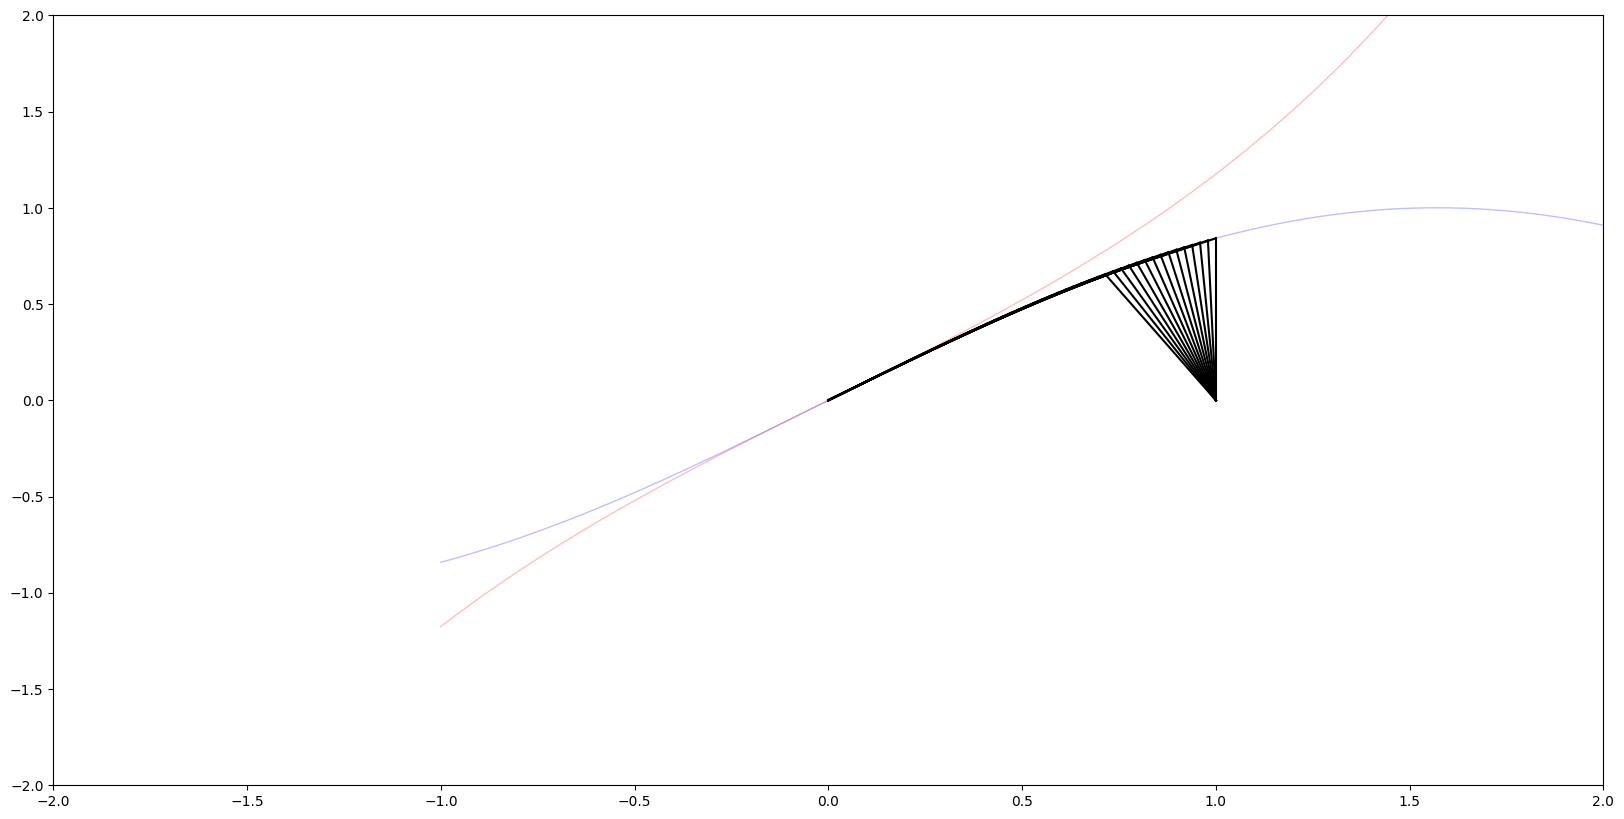

In [87]:
N0 = 1_000

xbin = np.linspace(-1, 2, N0)
y0 = f(xbin)
center = -np.pi
ya = f_approx1(-xbin, order = 4, center = center)
skip = 15
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xbin, y0, c='b', lw = 1, alpha=0.25)
ax.plot(xbin, ya, c='r', lw = 1, alpha=0.25)

N = 50
spacing = 1 / N
offset = spacing * (skip - 1)
print(spacing, offset)
# x = np.linspace(0 - offset, 1 + offset, N + 2*(skip - 1))
x = np.linspace(0, 1, N)

y = f(x)
for i in range(len(x) - skip):
    j = i+skip
    start_point = [x[i], y[i]]
    end_point = [x[j], y[j]]
    points = np.array([start_point, end_point])
    # print(points)
    c = [i/(len(x) - skip)]*3
    ax.plot(points[:,0], points[:,1], c='k')
    # break

for i in range(skip):
    sp, sp1 = [0,0], [1,0]
    ep, ep1 = [x[i], y[i]], [x[i*-1-1], y[i*-1-1]]
    p, p1 = np.array([sp, ep]), np.array([sp1, ep1])
    # t = np.vstack(p,p1)
    ax.plot(p[:,0], p[:,1], c='k')
    ax.plot(p1[:,0], p1[:,1], c='k')

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
plt.show()

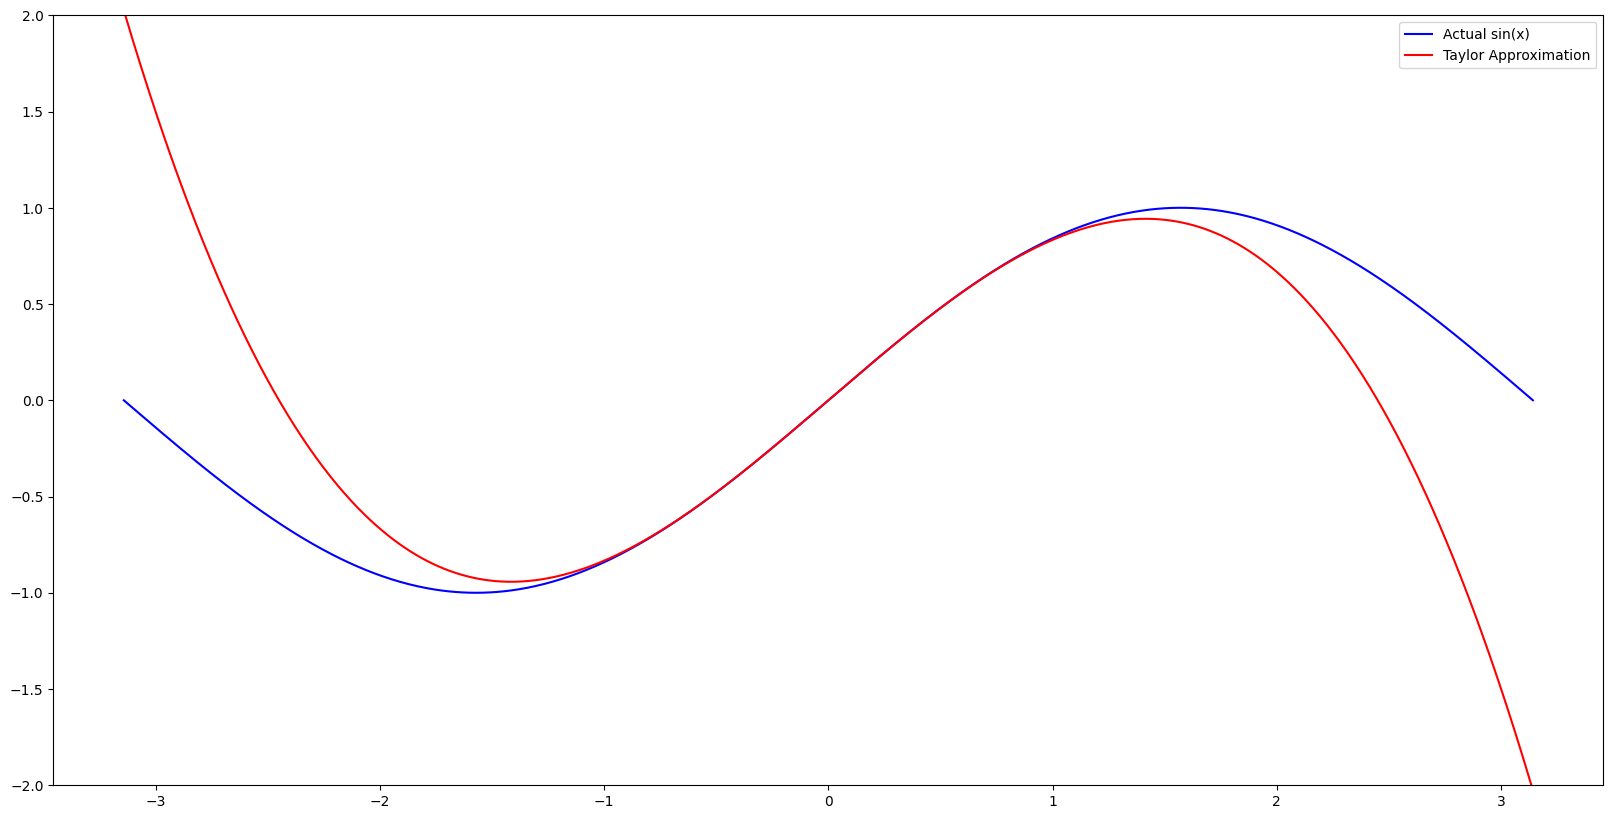

In [88]:
# Define x0 in the range [0, 2π]
x0 = np.linspace(-np.pi, np.pi, 1000)
y0 = f(x0)  # Actual function values
# center = np.pi / 2  # Center at π/2
center = 0
ya = f_approx(x0, order=4, center=center)  # Approximated values, with a higher order for better accuracy

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x0, y0, 'b', label='Actual sin(x)')
ax.plot(x0, ya, 'r', label='Taylor Approximation')
ax.set_ylim(-2, 2)
ax.legend()
plt.show()

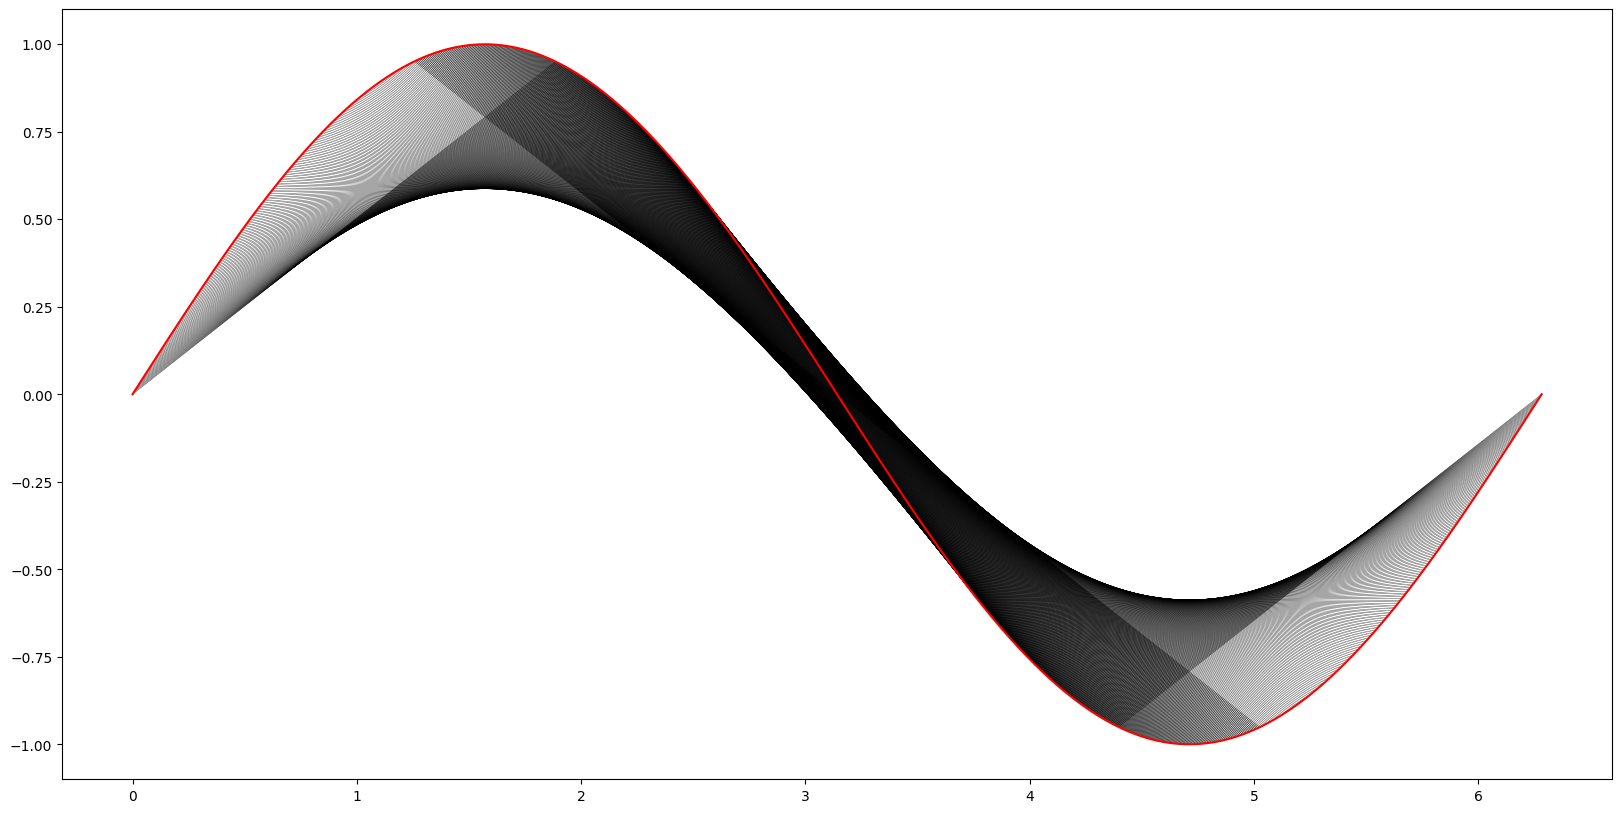

In [89]:
dots = 1000
xs = np.linspace(0, 2*np.pi, dots)
ys = f(xs)
skip = 300
fig, ax = plt.subplots(figsize = (20,10))
for i in range(int(dots/2)):
    start, start1 = xs[i], xs[i * -1 - 1]
    end, end1 = xs[i+skip], xs[(i + skip) * -1 - 1]
    pair = [start, end]
    ax.plot([start, end], [f(start), f(end)], c='k', lw = 0.25)
    ax.plot([start1, end1], [f(start1), f(end1)], c='k', lw = 0.25)
ax.plot(xs, ys, c = 'r')
plt.show()